# 1. Digits : 손글씨를 분류해 봅시다

## (1) 필요한 모듈 import 하기 


In [1]:
# 데이터 불러오는 모듈
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 모델 5개 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 결과 출력할 때 사용할 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

# 평가지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 기타
from collections import Counter


## (2) 데이터 준비

In [2]:
digits = load_digits()

## (3) 데이터 이해하기 

###### - Feature Data 지정하기
###### - Label Data 지정하기
###### - Target Names 출력해보기 
###### - 데이터 Describe 해보기



(64,)
(8, 8)


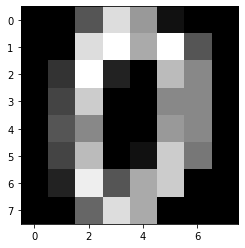

In [3]:
#이전에 학습을 할때는 digits의 data를 사용했지만 
# images에 대한 정보도 있어서 확인해보았다.
# data -> 64 / images -> 8x8

print(digits.data[0].shape)
print(digits.images[0].shape)
plt.imshow(digits.images[0], cmap='gray')
plt.show()

In [4]:
# Feature, Label Data 지정
digits_data = digits.data
digits_label = digits.target

# 이후에 split을 사용할 때 random하게 바뀌는지 확인하기 위해 확인
# 0~9까지 10개를 기준으로 반복되고 있는 것을 볼 수 있다.
print(digits_label[:20])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [5]:
# target names 출력해보기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# 데이터 Describe 해 보기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## (4) train, test 데이터 분리

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   random_state=8,
                                                   test_size=0.2)

# 랜덤시드를 줌으로써 기존에 0~9 순서였던 것이 랜덤하게 바뀌었다.
print(y_train[:20])

[0 5 4 8 8 7 2 1 0 3 8 2 1 8 8 4 1 5 5 3]


## (5) 다양한 모델로 학습시켜보기

#### 학습데이터를 활용해 분류기 모델을 만들기 : 함수를 Process 로 명명 
#### 입력받는 인자는 다음과 같다 
    1. Model_name
        -Decision tree
        -Random Forest 
        -SVM
        -SGD Classifier
        -Logistic Regression
    
    2. train_data, test_data
    
    3. metrics
        - accuracy
        - recall
        - f1_score

#### 3 가지의 값을 반환한다  
    1. score
    2. cf_matfix
    3. report


In [8]:
# 모든 모델에 대해서 다음 5개의 모델을 확인할 것이기 때문에 리스트로 이름을 저장해두었다.
models = ['Decision_Tree', 'Random_Forest', 'SVM', 'SGD_Gradient', 'Logistic_Regression']

In [9]:
def process(model_name, X_train, y_train, X_test, y_test, metrics='accuracy'):
    # 모델 분기문
    if model_name == "Decision_Tree":
        model = DecisionTreeClassifier(random_state=32)
    elif model_name == "Random_Forest":
        model = RandomForestClassifier()
    elif model_name == "SVM":
        model = SVC()
    elif model_name == "SGD_Gradient":
        model = SGDClassifier()
    elif model_name == "Logistic_Regression":
        model = LogisticRegression(max_iter=1000000)
    else :
        print("Wrong Model Name")
        return;
    
    # 학습 및 예측
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 평가지표 분기문
    if metrics == 'accuracy' :
        score = accuracy_score(y_test, y_pred)
    elif metrics == 'recall':
        score = recall_score(y_test, y_pred)
    elif metrics == 'f1_score':
        score = f1_score(y_test, y_pred, average='macro')
        
    # confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    # classification_report
    report = classification_report(y_test, y_pred)
    
    return score, cf_matrix, report, metrics

#### 모델별로 지표 확인 


<h7> 손글씨의 경우 accuracy 로 설정 : score 가 가장 높은 모델 출력
   

In [10]:
# 가장 높은 점수를 내는 모델을 확인하기 위한 dict
result_dict = {}

for i in models:
    score, cf_matrix, report, metrics = process(i, X_train, y_train, X_test, y_test)
    result_dict[i] = score
    print("{:>19} -> score : {:.3f}".format(i, score))

# score를 model을 키값으로 dict에 저장
highest, score = sorted(result_dict.items(), key = lambda x : x[1], reverse=True)[0]
print('')
print("평가지표 : {}\nscore가 가장 높은 모델 : {}, score : {:.3f}".format(metrics, highest, score))

      Decision_Tree -> score : 0.858
      Random_Forest -> score : 0.967
                SVM -> score : 0.981
       SGD_Gradient -> score : 0.958
Logistic_Regression -> score : 0.967

평가지표 : accuracy
score가 가장 높은 모델 : SVM, score : 0.981



# 2. Wine : 와인을 분류해 봅시다 

## (1) 라이브러리 import 


In [11]:
from sklearn.datasets import load_wine

## (2) 데이터 준비 

In [12]:
wines = load_wine()

## (3) 데이터 이해하기 

###### - Feature Data 지정하기
###### - Label Data 지정하기
###### - Target Names 출력해보기 
###### - 데이터 Describe 해보기

In [13]:
# Feature, Label Data 지정
wines_data = wines.data
wines_label = wines.target

# 이후에 split을 사용할 때 random하게 바뀌는지 확인하기 위해 확인
print(wines_label[:20])
print(wines_label[int(len(wines_label)*0.3):int(len(wines_label)*0.3)+20])
print(wines_label[len(wines_label)-20:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


   
   - label의 데이터가 0, 1, 2 가 차례대로 연속되게 나오는 것을 확인할 수 있다 
   -train_test_split 을 할 때, 섞어야한다
   -입력받은 와인의 정보들로 와인의 종류를 3 가지 중에 무엇인지 판별해야 한다  
      

In [14]:
# target names 출력해보기
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
for key, value in Counter(wines.target).items():
    print("{} : {}".format(wines.target_names[key], value))

class_0 : 59
class_1 : 71
class_2 : 48


- target 별 데이터 수 

In [16]:
# 데이터 Describe 해 보기
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## (4) train, test 데이터 분리

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wines_data,
                                                   wines_label,
                                                   random_state=7,
                                                   test_size=0.2,
                                                   stratify=wines_label)

# 랜덤시드를 줌으로써 기존에 연속적인 0, 1, 2를 섞어주었다.
print(y_train[:20])

[2 1 1 1 2 1 2 0 0 1 1 1 1 2 0 2 0 1 0 0]


## (5) 학습, 평가 및 지표설정


- 와인의 종류를 맞추기만 하는 단순한 문제로 평가지표는 accuracy 가 적합하다 생각했다 
- 각각의 요소는 어떠한 와인인지를 구분짓는 정보가 될 수 있다. 
= 따라서 와인의 특징 중에서 각 단계마다 몇가지 특성만 랜덤하게 골라서 예측하는 Random Forest 방식이 적합하다 예상한다.


In [30]:
for i in models:
    score, cf_matrix, report, metrics = process(i, X_train, y_train, X_test, y_test)
    result_dict[i] = score
    print("{:>19} -> score : {:.3f}".format(i, score))

highest, score = sorted(result_dict.items(), key = lambda x : x[1], reverse=True)[0]
print('')
print("평가지표 : {}\nscore가 가장 높은 모델 : {}, score : {:.3f}".format(metrics, highest, score))

      Decision_Tree -> score : 0.944
      Random_Forest -> score : 0.944
                SVM -> score : 0.639
       SGD_Gradient -> score : 0.417
Logistic_Regression -> score : 0.917

평가지표 : accuracy
score가 가장 높은 모델 : Decision_Tree, score : 0.944


# 3. Breast Cancer : 유방암 여부를 진단해 봅시다

## (1) 라이브러리 import 

In [19]:
from sklearn.datasets import load_breast_cancer

## (2) 데이터 준비 

In [20]:
bcs = load_breast_cancer()

## (3) 데이터 이해하기 

###### - Feature Data 지정하기
###### - Label Data 지정하기
###### - Target Names 출력해보기 
###### - 데이터 Describe 해보기

In [21]:
# Feature, Label Data 지정
bcs_data = bcs.data
bcs_label = bcs.target

# 이후에 split을 사용할 때 random하게 바뀌는지 확인하기 위해 확인 

print(bcs_label[:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [22]:
# target names 출력해보기
bcs.target_names

array(['malignant', 'benign'], dtype='<U9')

- target (label)은 악성과 양성을 구별한다

In [23]:
# 데이터 Describe 해 보기
print(bcs.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bcs_data,
                                                   bcs_label,
                                                   random_state=10,
                                                   test_size=0.2)

# 연속되어 있는 label은 아니였지만 그래도 random_state의 값을 주어서 label 데이터를 섞어주었다.
print(y_train[:20])

[0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1]


## (5) 학습, 평가 및 지표설정 

- 암이 악성일 경우는 Positive, 양성일 경우 Negative 이다. 
- 악성 암을 양성이라고 판단하는 것은 매우 위험하다 
- 따라서 지표는 Recall 또는 F1 Score 가 적합하다 
- F1 score 는 보통 label 이 불균형 구조일 때 모델의 성능을 정확하게 평가한다
- 지표 선택을 위해 label 의 비중을 확인해 보기로 한다 


In [25]:
from collections import Counter

for key, value in Counter(bcs.target).items():
    print("{:>9} : {}개".format(bcs.target_names[key], value))

malignant : 212개
   benign : 357개


- 데이터는 악성이 212개, 양성이 357개가 있는 것으로 확인된다 
- 크게 차이가 나는 것은 아니나 데이터셋이 비교적 작기 때문에 F1 score 를 사용하기로 한다. 
- 결과는 훈련된 분류 알고리즘의 성능을  보기 쉽도록 시각화 하여 confusion matrix 로  출력하기로 한다. 

      Decision_Tree -> score : 0.906
      Random_Forest -> score : 0.981
                SVM -> score : 0.909
       SGD_Gradient -> score : 0.921
Logistic_Regression -> score : 0.952

평가지표 : f1_score
score가 가장 높은 모델 : Random_Forest, score : 0.981
------------------------------------------------------
                    Decision_Tree                     
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.97      0.89      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

- - - - - - - - - - - - - - - - - - - - - - - - - - - 
                    Random_Forest                     
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0

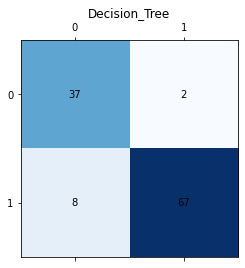

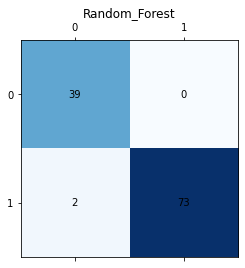

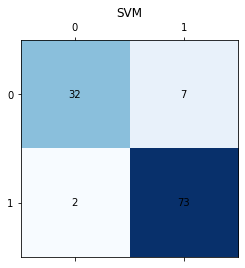

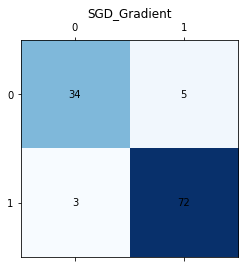

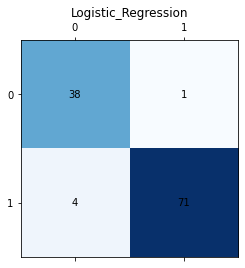

In [26]:
reports = {}
for i in models:
    score, cf_matrix, report, metrics = process(i, X_train, y_train, X_test, y_test, metrics="f1_score")
    result_dict[i] = score
    reports[i] = report
    print("{:>19} -> score : {:.3f}".format(i, score))
    
    fig, ax = plt.subplots()
    ax.matshow(cf_matrix, cmap=plt.cm.Blues)
    
    for x in range(2) :
        for y in range(2) :
            c = cf_matrix[y, x]
            ax.set_title(i)
            ax.text(x, y, str(c), va='center', ha='center')
    
    

highest, score = sorted(result_dict.items(), key = lambda x : x[1], reverse=True)[0]
print('')
print("평가지표 : {}\nscore가 가장 높은 모델 : {}, score : {:.3f}".format(metrics, highest, score))
print('-'*54)
for key, values in reports.items():
    print("{:^54}".format(key))
    print(values)
    print('- '*27)

#  회고 

## 1. Digits 
- Digits 의 경우 8x8, 총 64 개의 픽셀에 대한 정보들이 입력으로 들어간다. 
- Target (label) 에 대한 정보는 digit 이 0~9 까지의 숫자 중에 어떤 숫자인지 알려준다.
- 단순히 어떤 숫자인지 분류하는 것이기 때문에 accuracy 를 사용하는 것이 맞다고 생각했다. 
- 픽셀에 대한 정보가 특별히 숫자를 구분하는데 도움이 되지는 않기 때문에 한 점에서 입력되는 정보가 많아도 Random Forest 는 적합하지 않다고 판단했다.
- 모델의 accuracy 는 전체적으로 높은 편이였으며, 그중 decision tree 가 가장 낮고, SNM 이 가장 높았다. 


## 2. Wine 
- 와인 데이터셋은 관련 feature 가 13개, 분류해야 할 target (lable) 은 3개이다. 
- 와인 프로젝트도 단순히 어떤 종류의 와인인지 분류하는 것이기 때문에 accuracy 를 평가지표로 선택하였다. 
- 하지만 각각의 요소들은 어떤 와인인지 구별을 하는데 도움이 되는 정보이다. 
- 따라서 요소를 무작위로 선정하고 각 단계마다 몇가지 특성만 랜덤하게 골라서 예측하는 Random Forest 방식이 적합할거라고 예상했고 실제로 가장 높은 score 를 기록했다. 


## 3. Breast Cancer 
- 유방암 데이터셋은 feature 가 30개, target (label) 은 2개이다. 
- 유방암인 경우는 positive 이고 유방암이 아닌경우는 negative 이다. 
- 암이 실제로 없을 때 있다고 예측하는 것 (FP) 은 위험하지 않으나, 암이 있을 때 없다고 예측하는 것 (FN) 은 매우 위험한 일이다. 
- 따라서 데이터셋이 비교적 작기 떄문에 평가지표를 F1_score 로 설정하였다
- 유방암 데이터의 label 비율이 정확하게 같지는 않기 떄문에 아무래도 불균형 구조일 때 좀 더 적확한 점수를 내는 F1_score 가 가장 적합하다고 생각했다.  